<a href="https://colab.research.google.com/github/3r1kson/mobileCaseR/blob/main/mobileCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
R.version.string
#Pacotes necessarios - instalação

install.packages('tidyverse') #manipulação de dados
install.packages('ggplot2') #visualização
install.packages('cowplot') #visualização - unir gráficos
install.packages('caret') #modelos estatísticos
install.packages('corrplot') #matriz de correlação

#chamndo os pacotes ja instalados
library(caret)
library(tidyverse)
library(ggplot2)
library(cowplot)
library(corrplot)

[1] "R version 4.3.3 (2024-02-29)"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibb

In [4]:
#Loading data to Data Frame (dados)
dados <-read.csv("Telco-Customer-Churn.csv", stringsAsFactors = T)

#Vizualizing data
glimpse(dados)
summary(dados)

#Check missing data and exclude
colSums(is.na(dados)) #if null
dados_1 <-dados[!is.na(dados$TotalCharges),]
colSums(is.na(dados_1))
glimpse(dados_1)

Rows: 7,043
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-…
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport   

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0                0 
           Churn 
               0

Rows: 7,032
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-…
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport   

ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'MontlyChargers' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = err

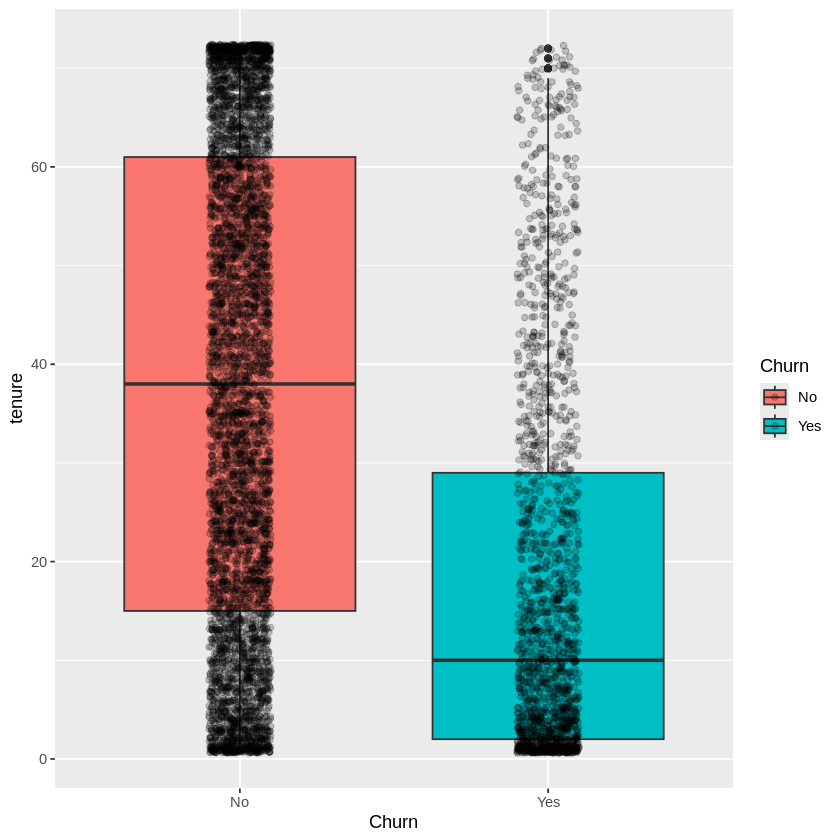

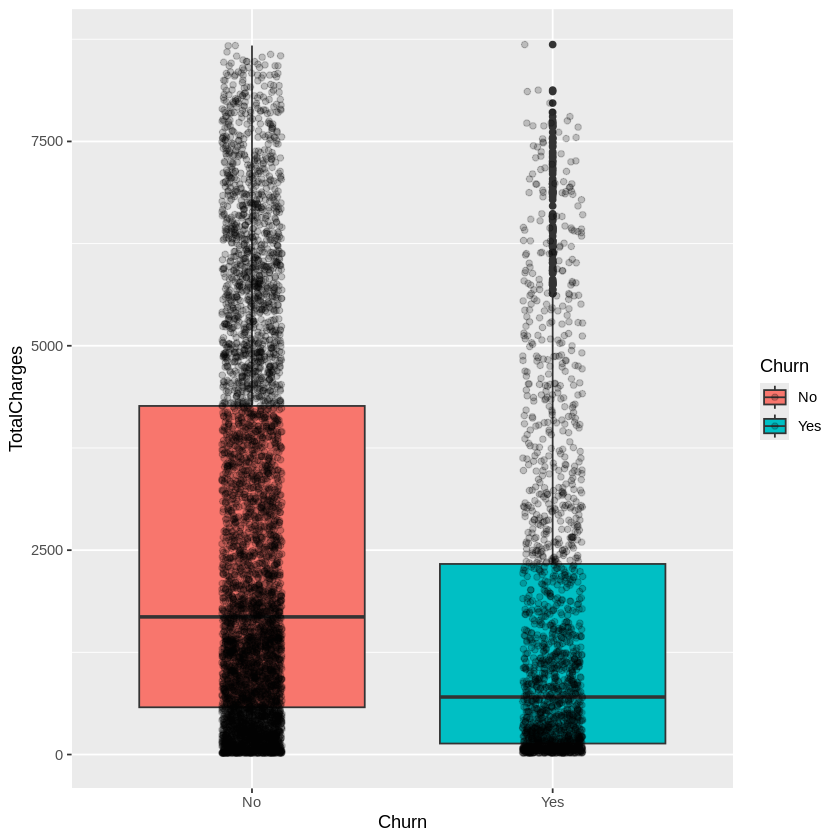

In [5]:
#Outliers - vizualize data dispersion via boxplot
dados_1 %>% ggplot(aes(x=Churn, y=tenure, fill=Churn)) + geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)
dados_1 %>% ggplot(aes(x=Churn, y=MontlyChargers, fill=Churn)) + geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)
dados_1 %>% ggplot(aes(x=Churn, y=TotalCharges, fill=Churn)) + geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)

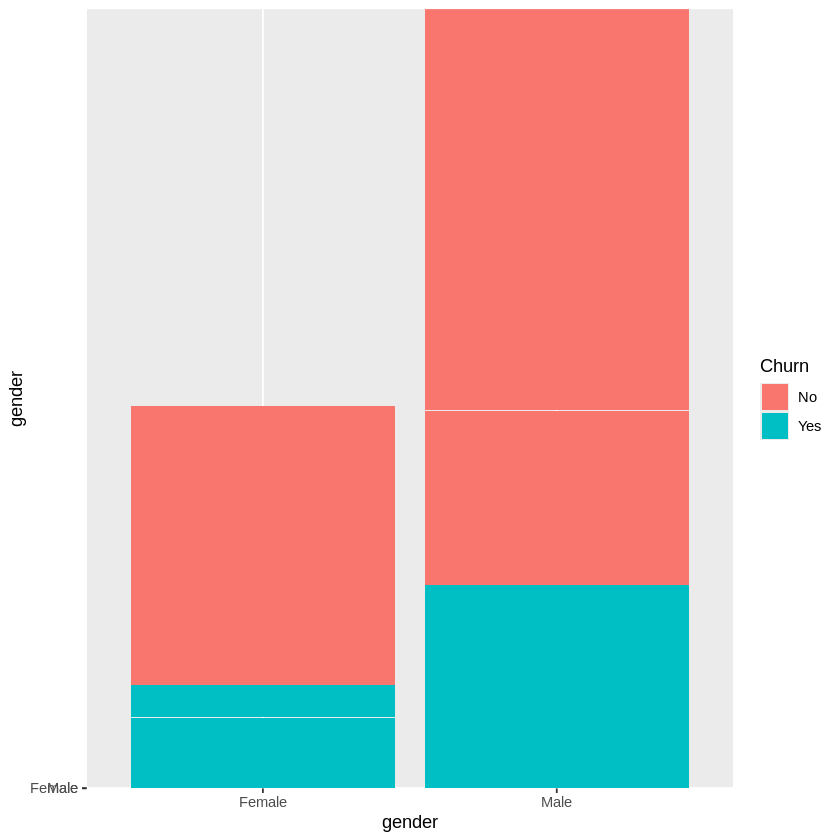

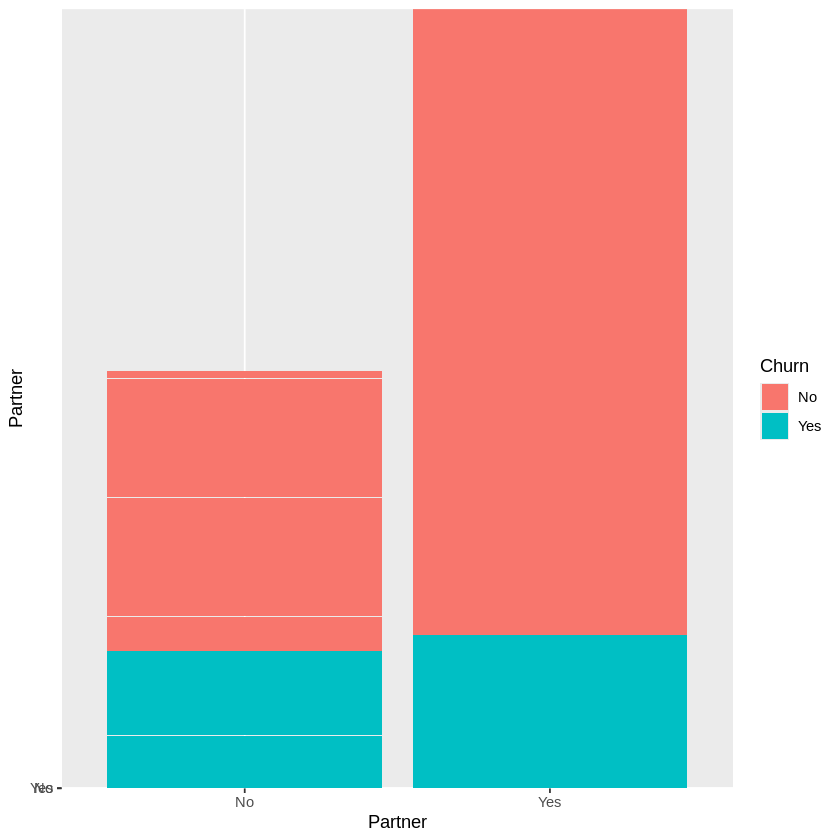

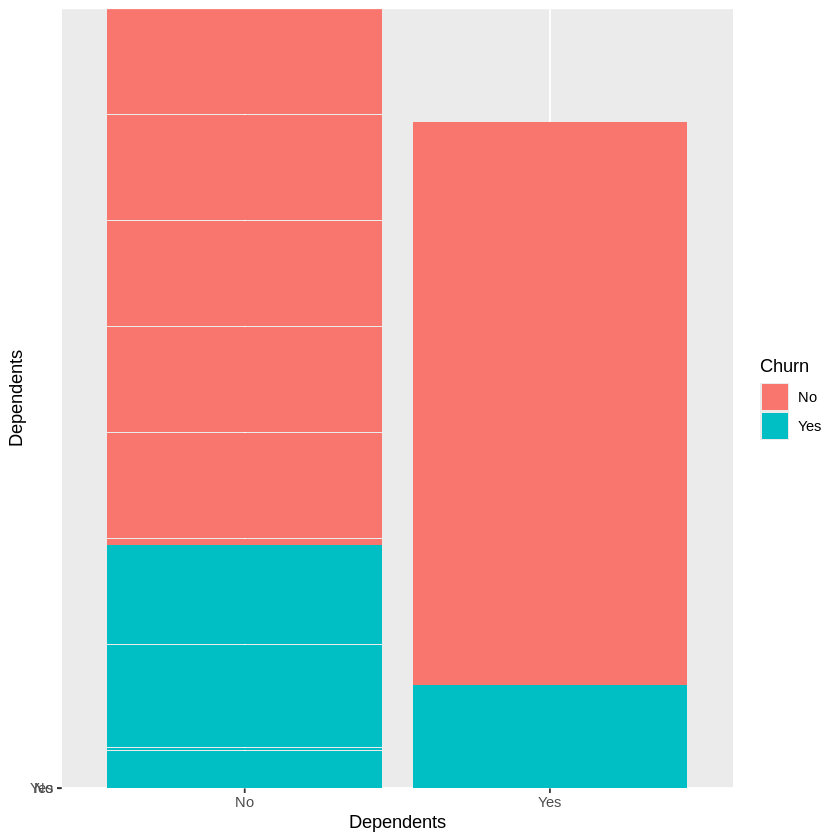

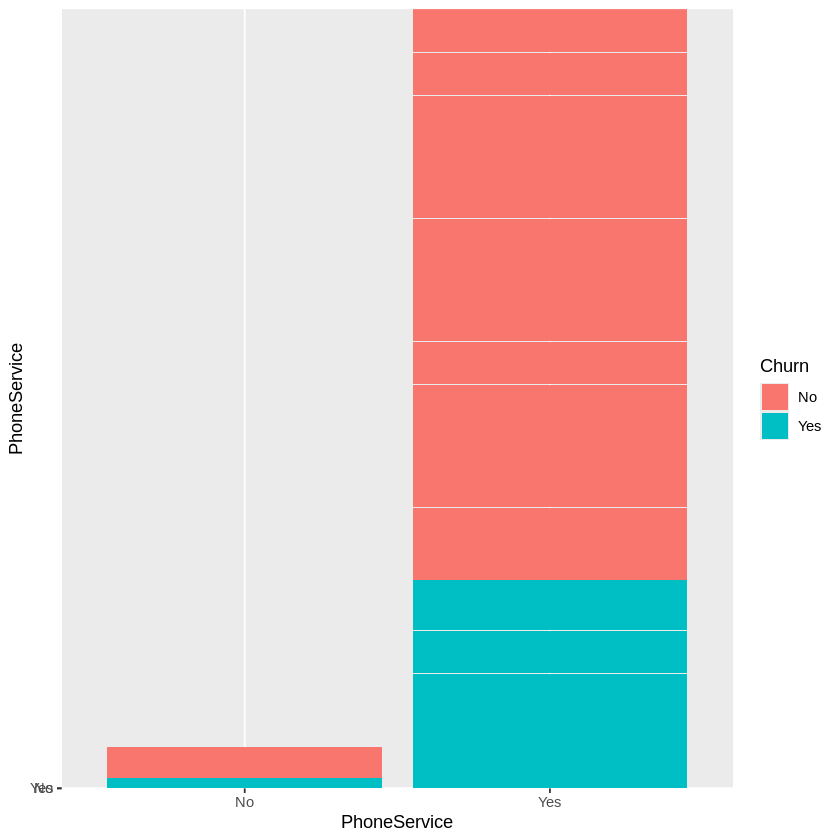

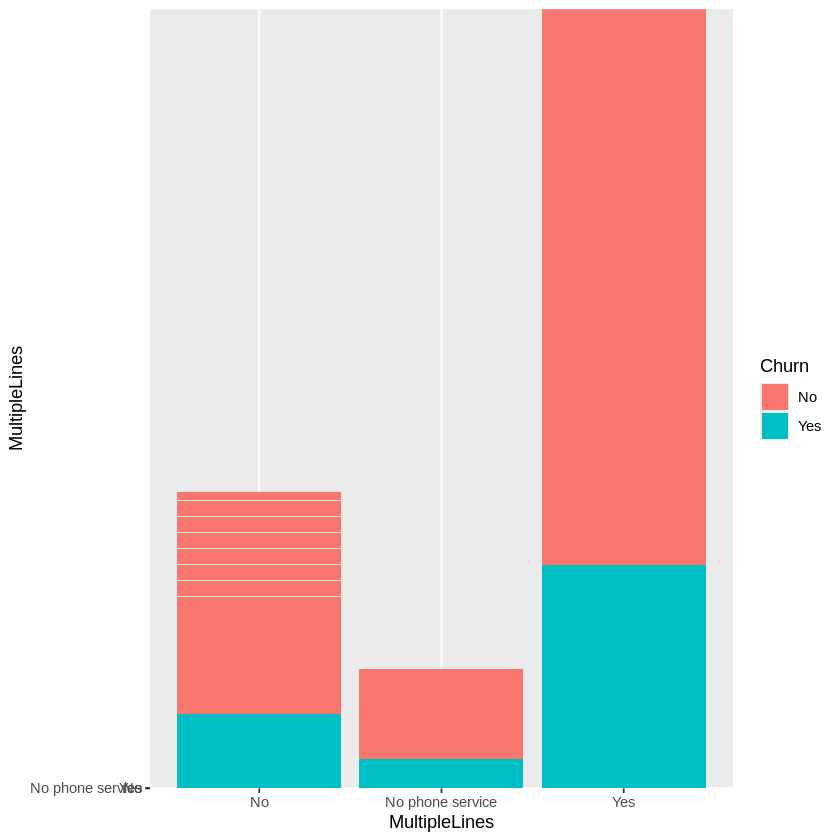

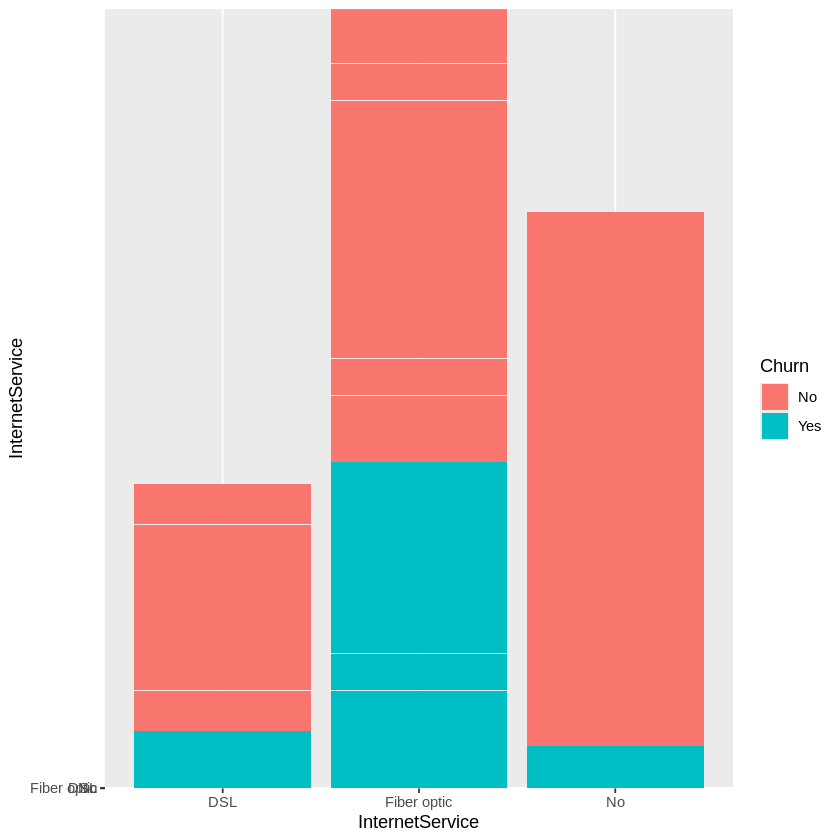

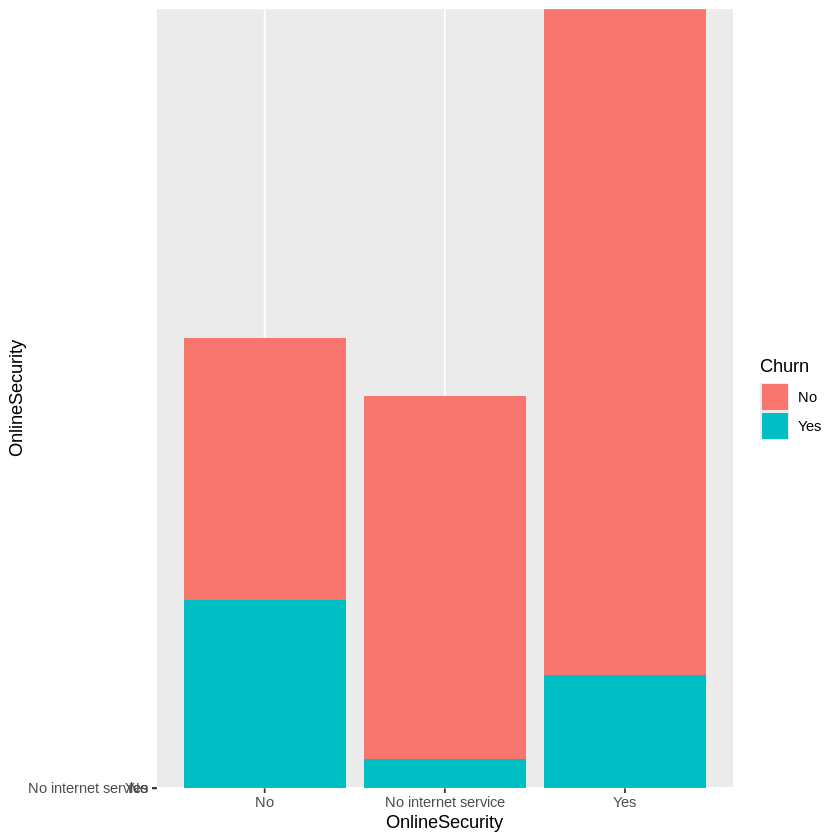

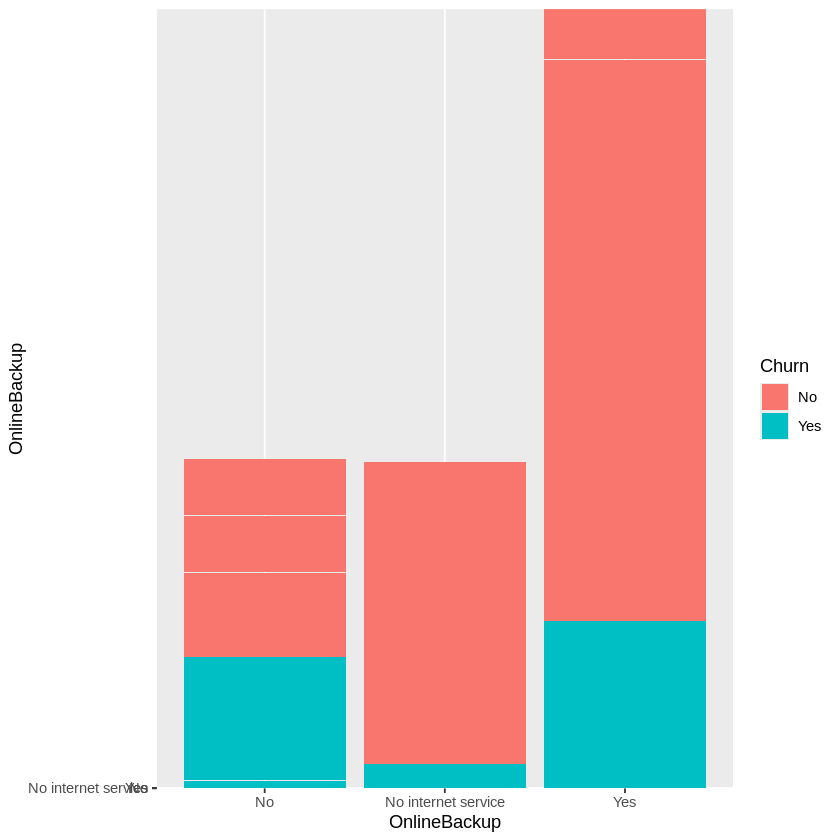

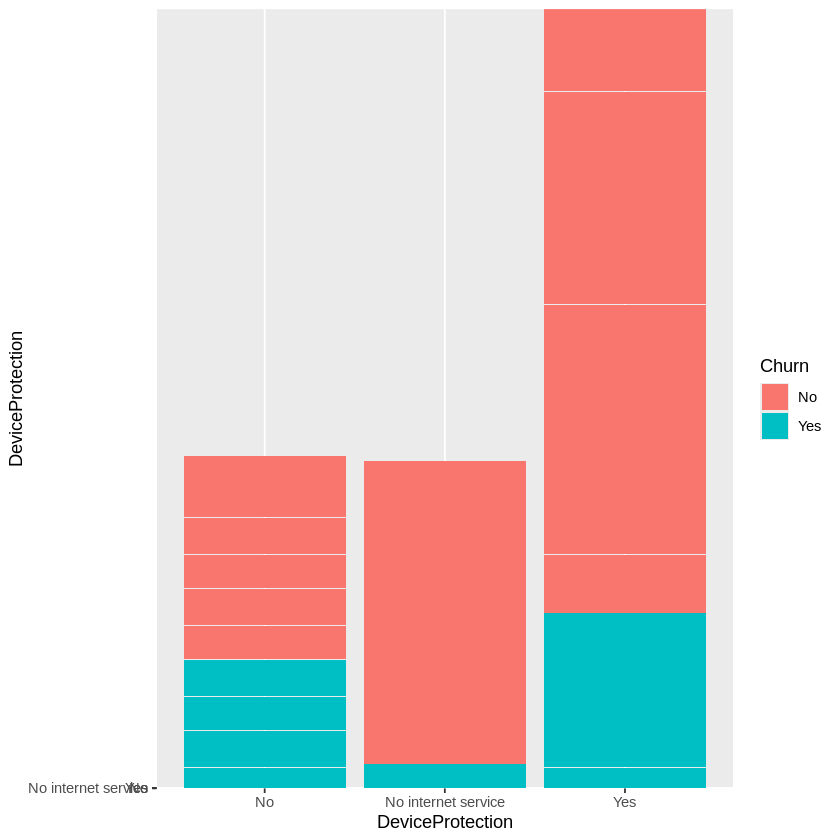

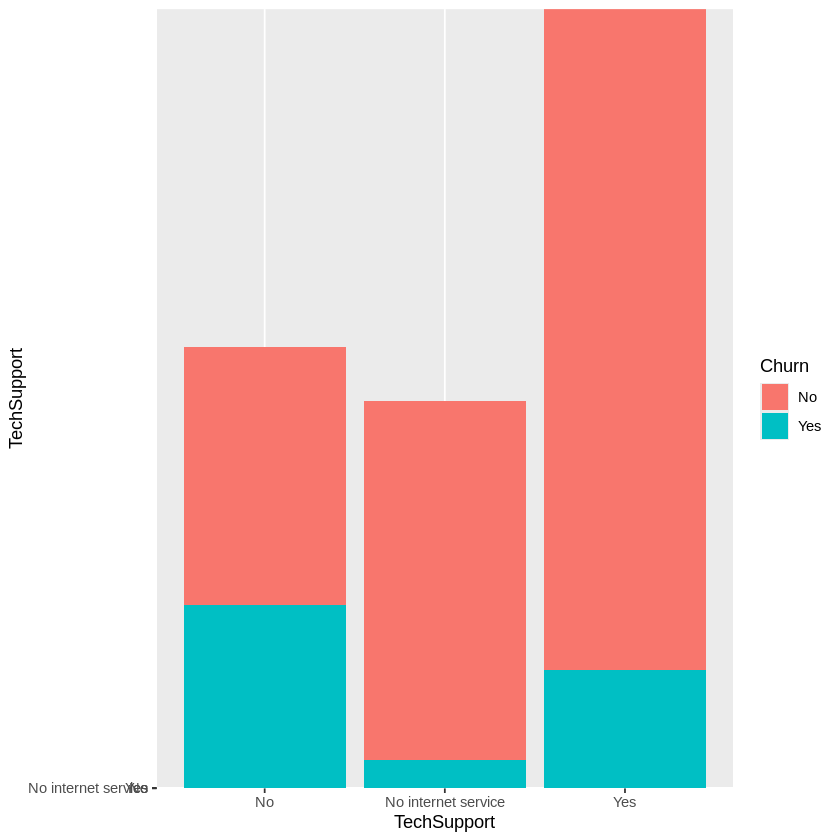

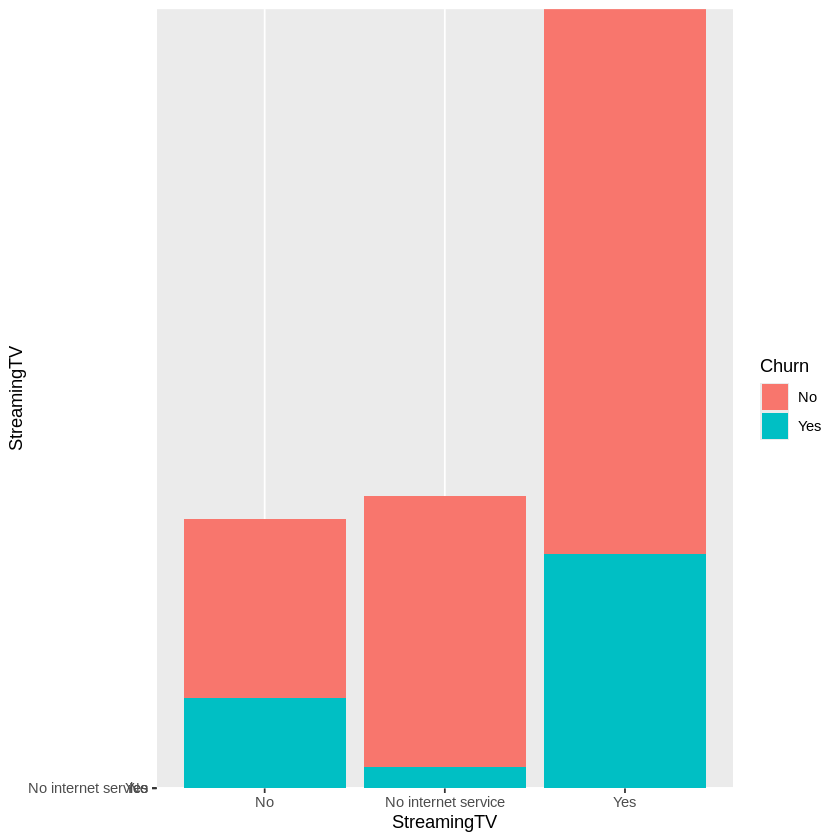

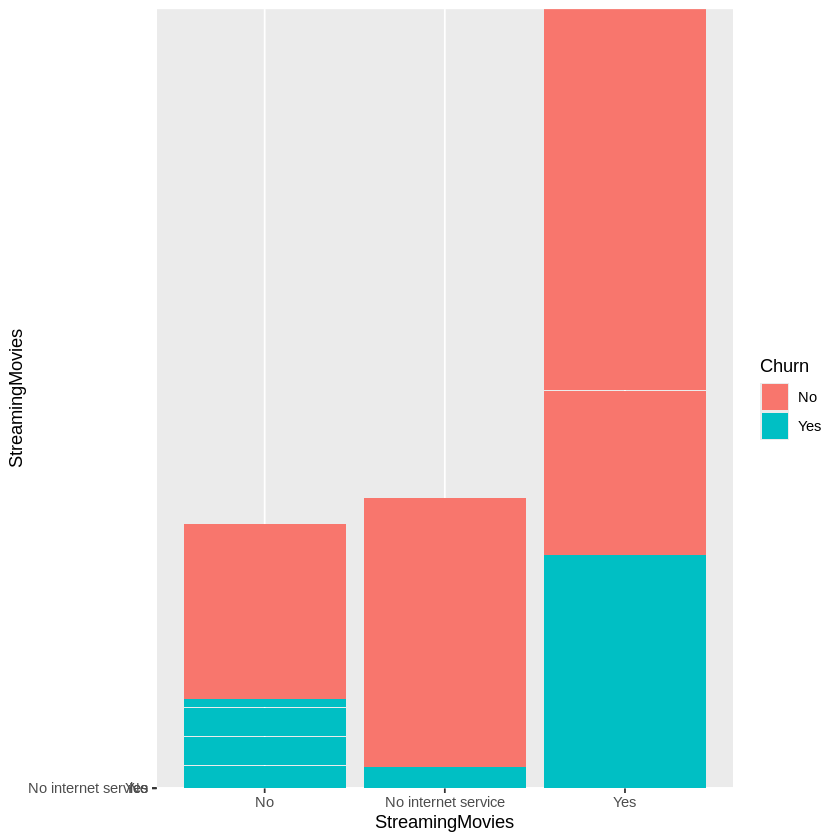

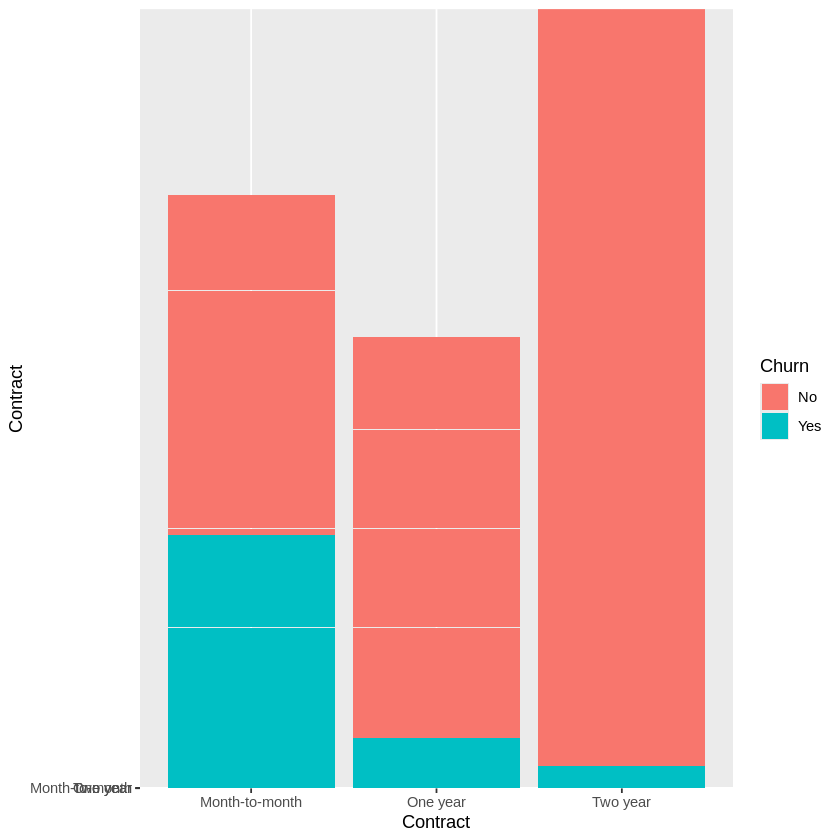

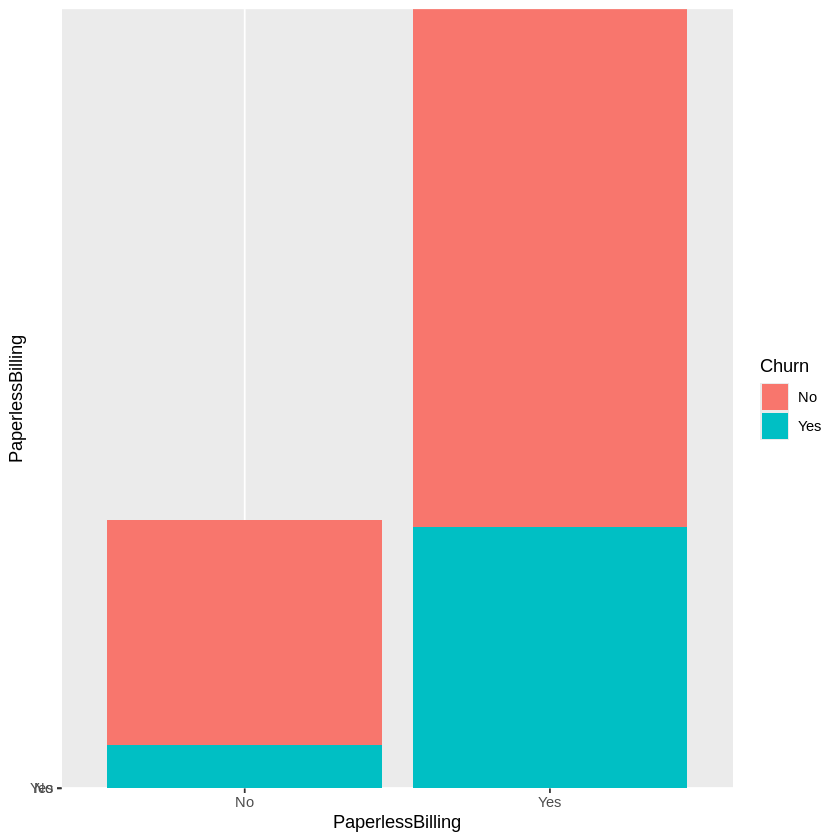

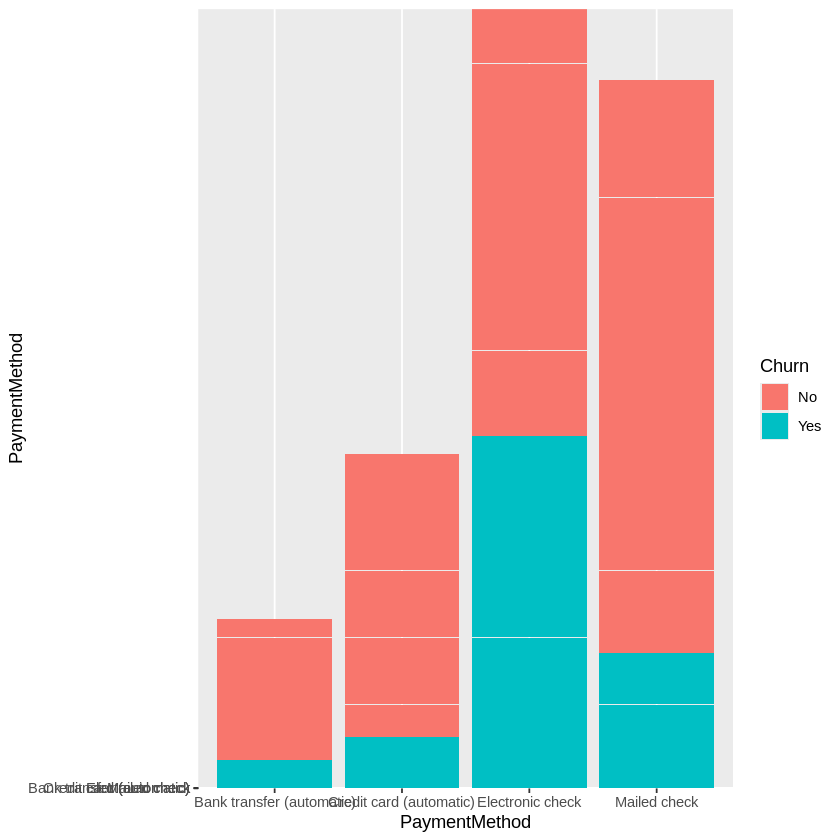

In [6]:
#Verifying the classification for each variable - cathegorical(factors)
ggplot(dados, aes(y = gender, x = gender, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = Partner, x = Partner, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = Dependents, x = Dependents, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = PhoneService, x = PhoneService, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = MultipleLines, x = MultipleLines, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = InternetService, x = InternetService, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = OnlineSecurity, x = OnlineSecurity, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = OnlineBackup, x = OnlineBackup, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = DeviceProtection, x = DeviceProtection, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = TechSupport, x = TechSupport, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = StreamingTV, x = StreamingTV, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = StreamingMovies, x = StreamingMovies, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = Contract, x = Contract, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = PaperlessBilling, x = PaperlessBilling, fill = Churn)) + geom_bar(stat = "identity")
ggplot(dados, aes(y = PaymentMethod, x = PaymentMethod, fill = Churn)) + geom_bar(stat = "identity")

Warning message:
“Removed 11 rows containing non-finite outside the scale range
(`stat_density()`).”


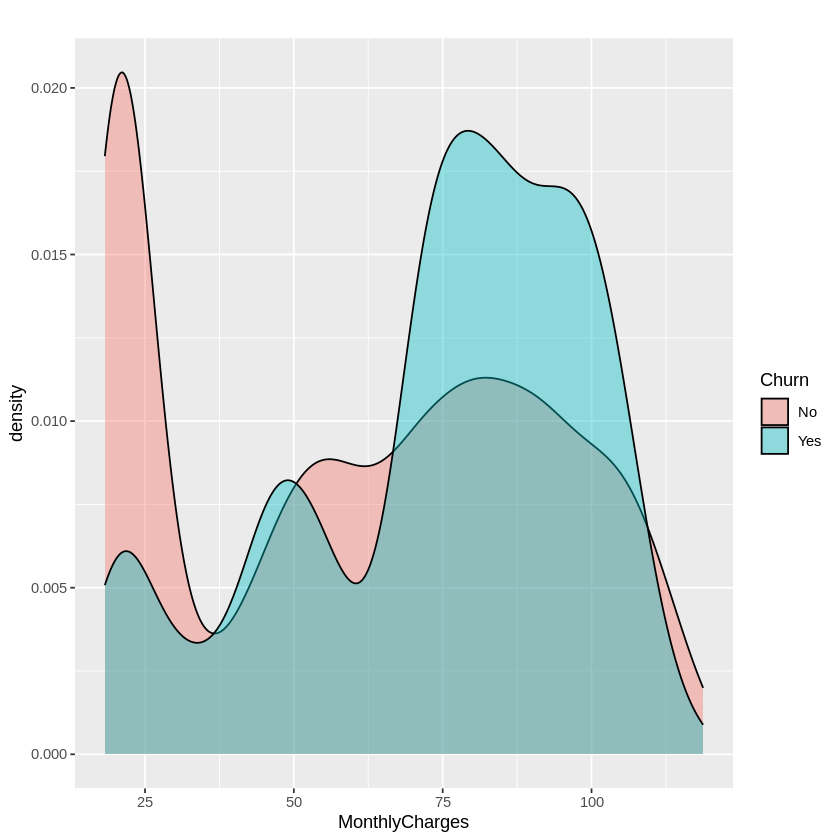

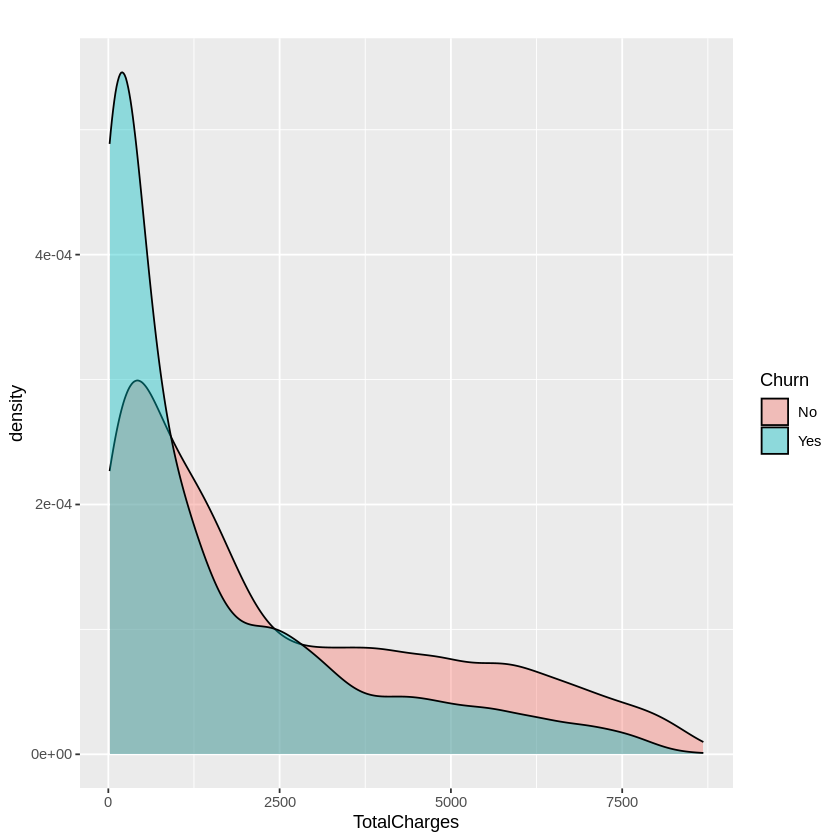

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3483   Min.   :0.0000   No :3639   No :4933  
 0003-MKNFE:   1   Male  :3549   1st Qu.:0.0000   Yes:3393   Yes:2099  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1624                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7026                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 1.00   No : 680     No              :3385   DSL        :2416  
 1st Qu.: 9.00   Yes:6352     No phone service: 680   Fiber optic:3096  
 Median :29.00                Yes             :2967   No         :1520  
 Mean   :32.42                                                          
 3rd Qu.:55.00                                             

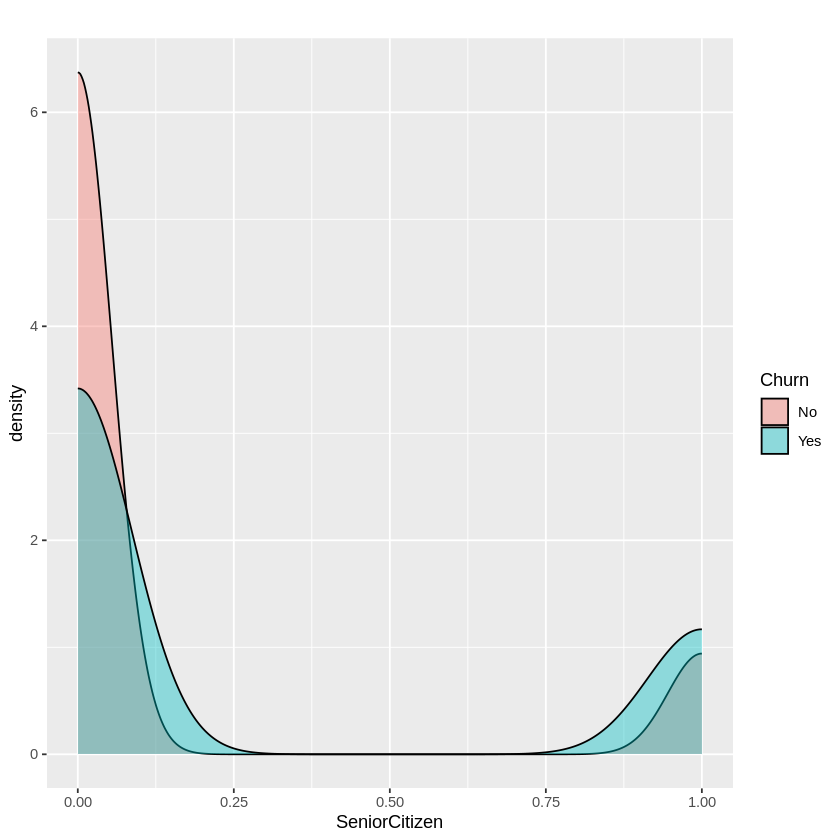

In [7]:
#Verifying the classification of each variable - numeric
ggplot(dados, aes(x = MonthlyCharges, fill = Churn)) + geom_density(alpha = 0.4) + labs(title = "")
ggplot(dados, aes(x = TotalCharges, fill = Churn)) + geom_density(alpha = 0.4) + labs(title = "")
ggplot(dados, aes(x = SeniorCitizen, fill = Churn)) + geom_density(alpha = 0.4) + labs(title = "")

summary(dados_1)

In [8]:
#Transforming data (qualitative to quantitative) - binary data
dados_quant <- dados_1
colnames(dados_quant)
dados_quant %>% mutate(customerID = NULL, PhoneService = as.factor(ifelse(PhoneService == "Yes", 1, 0)), Partner = as.factor(ifelse(Partner == "Yes", 1, 0)), Dependents = as.factor(ifelse(Dependents == "Yes", 1, 0)), PaperlessBilling = as.factor(ifelse(PaperlessBilling == "Yes", 1, 0)), Dependents = as.factor(ifelse(Dependents == "Yes", 1, 0)), Churn = as.factor(ifelse(Churn == "Yes", 1, 0)),) -> dados_quant
glimpse(dados_quant)

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

Rows: 7,032
Columns: 20
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,…
$ Dependents       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport      <fct> No, No, No, Yes, No, No, No, No, Yes, No, No, No inte…
$ StreamingTV   

In [9]:
#Using dummy variables
dummy_dados <- dados_quant %>% select(InternetService, Contract, PaymentMethod, MultipleLines, OnlineBackup, OnlineSecurity, DeviceProtection, StreamingTV, StreamingMovies, TechSupport)
dummy <- dummyVars(~ ., data = dummy_dados, fullRank = T)
dummy_dados <- predict(dummy, dummy_dados)
dados_quant1 <- bind_cols(dados_quant, dummy_dados)
dados_quant1 %>% rename( InternetService.Fiberoptic =`InternetService.Fiber optic`, Contract.Oneyear = `Contract.One year`, Contract.Twoyear = `Contract.Two year`, PaymentMethod.Creditcard = `PaymentMethod.Credit card (automatic)`, PaymentMethod.Electronic = `PaymentMethod.Electronic check`, PaymentMethod.Mailed = `PaymentMethod.Mailed check`, MultipleLines.NoService = `MultipleLines.No phone service`, OnlineBackup.NoService = `OnlineBackup.No internet service` , OnlineSecurity.NoService = `OnlineSecurity.No internet service`, DeviceProtection.NoService = `DeviceProtection.No internet service`, StreamingTV.NoService = `StreamingTV.No internet service`, StreamingMovies.NoService = `StreamingMovies.No internet service`, TechSupport.NoService = `TechSupport.No internet service`) -> dados_quant1

In [10]:
#Exclusion of qualitative variables
dados_quant1 %>% mutate(gender = NULL, InternetService = NULL, Contract = NULL, PaymentMethod = NULL, PaymentOnlineBackupMethod = NULL, OnlineSecurity = NULL, StreamingTV = NULL, StreamingMovies = NULL, MultipleLines = NULL, OnlineBackup = NULL, DeviceProtection = NULL, TechSupport = NULL) -> dados_quant1
glimpse(dados_quant1)


Rows: 7,032
Columns: 30
$ SeniorCitizen              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Partner                    <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0…
$ Dependents                 <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ tenure                     <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16,…
$ PhoneService               <fct> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1…
$ PaperlessBilling           <fct> 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1…
$ MonthlyCharges             <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 8…
$ TotalCharges               <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 82…
$ Churn                      <fct> 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0…
$ InternetService.Fiberoptic <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1…
$ InternetService.No         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ Contract.Oneyear           <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0…
$ Contract.Twoye

Rows: 7,032
Columns: 30
$ SeniorCitizen              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Partner                    <dbl> 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1…
$ Dependents                 <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ tenure                     <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16,…
$ PhoneService               <dbl> 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2…
$ PaperlessBilling           <dbl> 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2…
$ MonthlyCharges             <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 8…
$ TotalCharges               <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 82…
$ Churn                      <dbl> 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1…
$ InternetService.Fiberoptic <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1…
$ InternetService.No         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ Contract.Oneyear           <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0…
$ Contract.Twoye

Warning message in cor(dados_num):
“the standard deviation is zero”


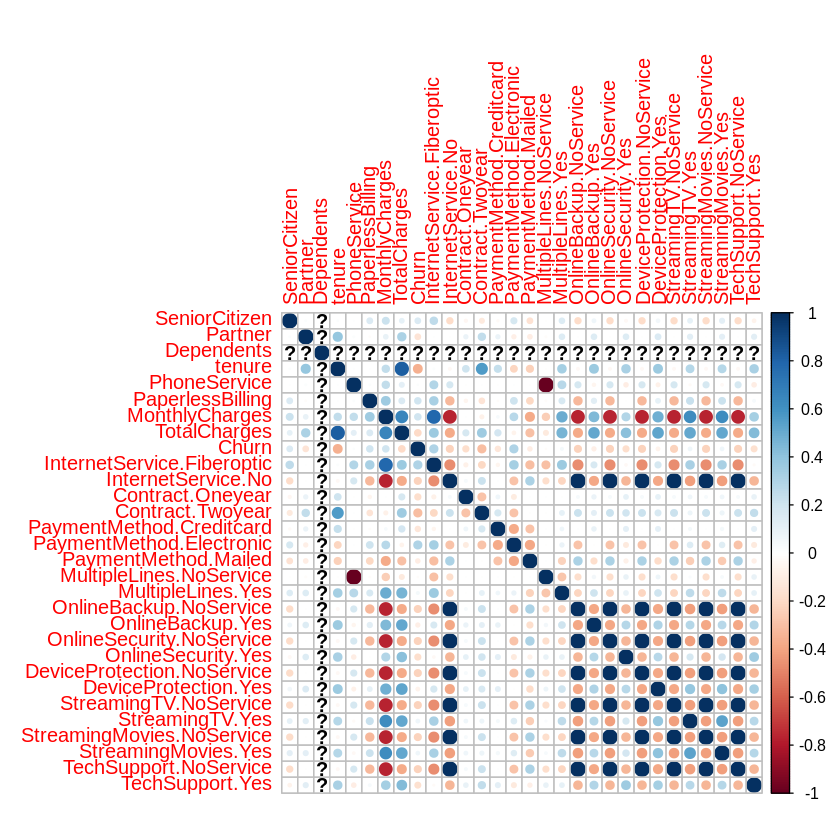

In [11]:
#Data Correlation
#all data with <fct> transform to numeric
dados_quant1 %>% mutate(Partner = as.numeric(Partner), Dependents = as.numeric(Dependents), PhoneService = as.numeric(PhoneService), PaperlessBilling = as.numeric(PaperlessBilling), Churn = as.numeric(Churn)) -> dados_num
glimpse(dados_num)

corrplot(cor(dados_num), method = "circle")

Rows: 7,032
Columns: 29
$ SeniorCitizen              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Partner                    <dbl> 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1…
$ tenure                     <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16,…
$ PhoneService               <dbl> 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2…
$ PaperlessBilling           <dbl> 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2…
$ MonthlyCharges             <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 8…
$ TotalCharges               <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 82…
$ Churn                      <dbl> 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1…
$ InternetService.Fiberoptic <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1…
$ InternetService.No         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ Contract.Oneyear           <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0…
$ Contract.Twoyear           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ PaymentMethod.

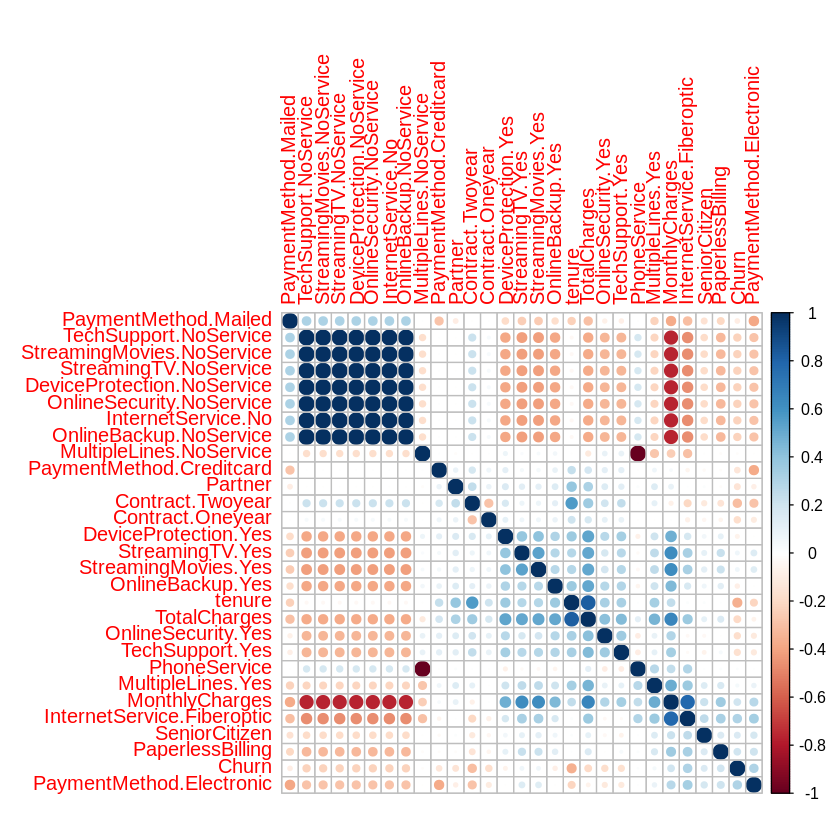

In [12]:
dados_num %>% mutate(Dependents = NULL) -> dados_num_1
glimpse(dados_num_1)

corrplot(cor(dados_num_1), order = "hclust", method = "circle")

In [13]:
dados_num_1 %>% mutate(StreamingMovies.NoService = NULL, StreamingTV.NoService = NULL, OnlineSecurity.NoService = NULL, InternetService.NoService = NULL, OnlineBackup.NoService = NULL) -> dados_num_1

In [14]:
#balanceamento de base de dados
dados_quant1 %>% select(Churn) %>% group_by(Churn) %>% summarise(n = n())
dados_quant1 %>% filter(Churn == 0) %>% sample_n(1869) -> dados_quant_0

dados_quant1 %>% filter(Churn == 1) -> dados_quant_1
dados_quant_balanc <- bind_rows(dados_quant_0,dados_quant_1)
dados_num_1 %>% select(Churn) %>% group_by(Churn) %>% summarise(n = n())
dados_num_1 %>% mutate(Churn = ifelse(Churn == 1,0,1)) %>% filter(Churn == 0) %>% sample_n(1869) -> dados_num_0
dados_num_1 %>% mutate(Churn = ifelse(Churn == 1,0,1))%>% filter(Churn == 1) -> dados_num_2
dados_num_balanc <- bind_rows(dados_num_2,dados_num_0)
dados_num_balanc %>% select(Churn) %>% group_by(Churn) %>% summarise(n = n())
dados_quant_balanc %>% select(Churn) %>% group_by(Churn) %>% summarise(n = n())

Churn,n
<fct>,<int>
0,5163
1,1869


Churn,n
<dbl>,<int>
1,5163
2,1869


Churn,n
<dbl>,<int>
0,1869
1,1869


Churn,n
<fct>,<int>
0,1869
1,1869


In [16]:
#stepwize
#verificar quais as variaveis agregam ao modelo
modelo_teste1 <- glm(data = dados_num_balanc, Churn ~ .,family=binomial)
step(modelo_teste1)
summary(modelo_teste1)

Start:  AIC=3655.83
Churn ~ SeniorCitizen + Partner + tenure + PhoneService + PaperlessBilling + 
    MonthlyCharges + TotalCharges + InternetService.Fiberoptic + 
    InternetService.No + Contract.Oneyear + Contract.Twoyear + 
    PaymentMethod.Creditcard + PaymentMethod.Electronic + PaymentMethod.Mailed + 
    MultipleLines.NoService + MultipleLines.Yes + OnlineBackup.Yes + 
    OnlineSecurity.Yes + DeviceProtection.NoService + DeviceProtection.Yes + 
    StreamingTV.Yes + StreamingMovies.Yes + TechSupport.NoService + 
    TechSupport.Yes


Step:  AIC=3655.83
Churn ~ SeniorCitizen + Partner + tenure + PhoneService + PaperlessBilling + 
    MonthlyCharges + TotalCharges + InternetService.Fiberoptic + 
    InternetService.No + Contract.Oneyear + Contract.Twoyear + 
    PaymentMethod.Creditcard + PaymentMethod.Electronic + PaymentMethod.Mailed + 
    MultipleLines.NoService + MultipleLines.Yes + OnlineBackup.Yes + 
    OnlineSecurity.Yes + DeviceProtection.NoService + DeviceProtection.Y


Call:  glm(formula = Churn ~ SeniorCitizen + tenure + PhoneService + 
    PaperlessBilling + MonthlyCharges + TotalCharges + InternetService.Fiberoptic + 
    InternetService.No + Contract.Oneyear + Contract.Twoyear + 
    PaymentMethod.Electronic + MultipleLines.Yes + OnlineBackup.Yes + 
    DeviceProtection.Yes + StreamingTV.Yes + StreamingMovies.Yes, 
    family = binomial, data = dados_num_balanc)

Coefficients:
               (Intercept)               SeniorCitizen  
                 1.9646823                   0.2288261  
                    tenure                PhoneService  
                -0.0564701                   0.8800058  
          PaperlessBilling              MonthlyCharges  
                 0.3374800                  -0.0813352  
              TotalCharges  InternetService.Fiberoptic  
                 0.0003326                   2.8267100  
        InternetService.No            Contract.Oneyear  
                -2.8657983                  -0.6958132  
         


Call:
glm(formula = Churn ~ ., family = binomial, data = dados_num_balanc)

Coefficients: (3 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 2.140e+00  4.532e-01   4.721 2.35e-06 ***
SeniorCitizen               2.298e-01  1.093e-01   2.102 0.035530 *  
Partner                    -1.053e-01  8.918e-02  -1.181 0.237507    
tenure                     -5.644e-02  7.057e-03  -7.997 1.27e-15 ***
PhoneService                7.225e-01  8.191e-01   0.882 0.377786    
PaperlessBilling            3.359e-01  9.266e-02   3.625 0.000289 ***
MonthlyCharges             -7.371e-02  4.037e-02  -1.826 0.067903 .  
TotalCharges                3.365e-04  8.138e-05   4.135 3.55e-05 ***
InternetService.Fiberoptic  2.630e+00  1.015e+00   2.592 0.009551 ** 
InternetService.No         -2.662e+00  1.024e+00  -2.599 0.009356 ** 
Contract.Oneyear           -6.863e-01  1.288e-01  -5.327 1.00e-07 ***
Contract.Twoyear           -

In [20]:
# Validação cruzada - avalia a capacidade de generalização do modelo
#O método de validação cruzada denominado k-fold consiste em dividir o conjunto
#total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e,
#a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são
#utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. #Este processo é realizado k vezes alternando de forma circular o subconjunto de teste.

trainIndex <- createDataPartition(dados_num_balanc$Churn, p = .8, list = FALSE, times = 1)

mobileTrain <- dados_num_balanc[trainIndex,]
mobileTest <- dados_num_balanc[-trainIndex,]

In [21]:
#training the base
set.seed(150)

glm_model = train(Churn ~ SeniorCitizen + tenure + PaperlessBilling + MonthlyCharges + TotalCharges + InternetService.Fiberoptic + Contract.Oneyear + Contract.Twoyear + PaymentMethod.Electronic + MultipleLines.Yes + OnlineSecurity.Yes + StreamingTV.Yes + StreamingMovies.Yes + TechSupport.NoService, data= mobileTrain, method= "glm", trControl = trainControl(method = "cv"), family = "binomial")


summary(glm_model)
varImp(glm_model)

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”



Call:
NULL

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 1.6230195  0.4096748   3.962 7.44e-05 ***
SeniorCitizen               0.2349253  0.1221704   1.923 0.054489 .  
tenure                     -0.0529753  0.0077342  -6.849 7.41e-12 ***
PaperlessBilling            0.3300288  0.1041781   3.168 0.001535 ** 
MonthlyCharges             -0.0366912  0.0078790  -4.657 3.21e-06 ***
TotalCharges                0.0002965  0.0000907   3.269 0.001080 ** 
InternetService.Fiberoptic  1.8884881  0.2532606   7.457 8.87e-14 ***
Contract.Oneyear           -0.7632566  0.1434354  -5.321 1.03e-07 ***
Contract.Twoyear           -1.5636874  0.2180887  -7.170 7.50e-13 ***
PaymentMethod.Electronic    0.2688267  0.1001147   2.685 0.007249 ** 
MultipleLines.Yes           0.3073301  0.1263119   2.433 0.014970 *  
OnlineSecurity.Yes         -0.2091886  0.1237206  -1.691 0.090872 .  
StreamingTV.Yes             0.5994531  0.1404973   4.267 1.98e-

glm variable importance

                           Overall
InternetService.Fiberoptic 100.000
Contract.Twoyear            95.027
TechSupport.NoService       94.614
tenure                      89.469
Contract.Oneyear            62.964
MonthlyCharges              51.441
StreamingTV.Yes             44.674
StreamingMovies.Yes         35.745
TotalCharges                27.369
PaperlessBilling            25.618
PaymentMethod.Electronic    17.246
MultipleLines.Yes           12.874
SeniorCitizen                4.026
OnlineSecurity.Yes           0.000

In [22]:
#testando a base
reg_log_pred <- predict(glm_model, mobileTrain)
reg_log_pred1 <- data.frame(reg_log_pred)
reg_log_pred1$reg_log_pred <- as.factor(ifelse(reg_log_pred1$reg_log_pred >= 0.5,1,0))
reg_log_pred1$reg_log_pred <- as.factor(ifelse(reg_log_pred1$reg_log_pred == 1,"evadido","cliente"))
mobileTrain$Churn <- as.factor(mobileTrain$Churn)
mobileTrain$Churn <- as.factor(ifelse(mobileTrain$Churn == 1,"evadido","cliente"))
glimpse(reg_log_pred1)

matrix_reg <- confusionMatrix(data = reg_log_pred1$reg_log_pred, reference = mobileTrain $Churn, positive = "evadido")
matrix_reg$table
metricas <- data.frame(matrix_reg$byClass)

Rows: 2,992
Columns: 1
$ reg_log_pred <fct> evadido, evadido, evadido, evadido, evadido, cliente, eva…


          Reference
Prediction cliente evadido
   cliente    1098     282
   evadido     398    1214

In [23]:
glimpse(dados_1)
#excluir o ID
#transformar em qualitativa as quantitativas
#Adicionar classes as variáveis numericas
dados_1 %>%mutate (SeniorCitizen = as.factor(ifelse(SeniorCitizen == 1, "Yes", "No")), customerID = NULL) -> dados_quali

Rows: 7,032
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-…
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport   

In [24]:
#criando classes para as variaveis quantitativas
tenure <- summary(dados_quali$tenure)
tenure

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   29.00   32.42   55.00   72.00 

In [26]:
TotalCharges <- summary(dados_quali$TotalCharges)
min_TotalCharges <- TotalCharges[[1]]-5
q1_TotalCharges <- TotalCharges[[2]]
q2_TotalCharges <- TotalCharges[[3]]
q3_TotalCharges <- TotalCharges[[5]]
max_TotalCharges <- TotalCharges[[6]]+5
dados_quali %>%mutate(TotalCharges = cut(TotalCharges, breaks = c(min_TotalCharges, q1_TotalCharges, q2_TotalCharges, q3_TotalCharges, max_TotalCharges))) -> dados_quali

summary(dados_quali$TotalCharges)

(13.8,401]       (401,1.4e+03]  (1.4e+03,3.79e+03] (3.79e+03,8.69e+03] 
               1758                1758                1758                1758

In [27]:
#balanceamento da base
glimpse(dados_quali)
dados_quali %>% select(Churn) %>% group_by(Churn) %>% summarise(n = n())
dados_quali %>% filter(Churn == "No") %>% sample_n(1869) -> dados_quali_no
dados_quali %>%filter(Churn == "Yes") -> dados_quali_yes
dados_quali_balanc <- bind_rows(dados_quali_no,dados_quali_yes)
dados_quali_balanc %>% select(Churn) %>% group_by(Churn) %>% summarise(n = n())

Rows: 7,032
Columns: 20
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, N…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport      <fct> No, No, No, Yes, No, No, No, No, Yes, No, No, No inte…
$ StreamingTV   

Churn,n
<fct>,<int>
No,5163
Yes,1869


Churn,n
<fct>,<int>
No,1869
Yes,1869


In [30]:
# #separação da base para teste e treino
trainIndex_quali <- createDataPartition(dados_quali_balanc$Churn, p = .8, list = FALSE, times = 1)
mobileTrain_quali <- dados_quali_balanc[ trainIndex_quali,]
mobileTest_quali <- dados_quali_balanc[-trainIndex_quali,]

In [36]:
#treinando o modelo de árvore de decisão
vivo.tree = train(Churn ~ .,data= mobileTrain_quali, method="rpart",trControl = trainControl(method = "cv"))

In [37]:
vivo.tree

CART 

2992 samples
  19 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2692, 2693, 2692, 2692, 2693, 2694, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02640374  0.7376355  0.4752175
  0.18048128  0.6915181  0.3829059
  0.28676471  0.5648821  0.1299092

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02640374.

In [38]:
fancyRpartPlot(vivo.tree$finalModel)

ERROR: Error in fancyRpartPlot(vivo.tree$finalModel): could not find function "fancyRpartPlot"


In [39]:
vivo.pred = predict(vivo.tree, newdata = mobileTrain_quali)

In [40]:
matrix_tree <- confusionMatrix(data = vivo.pred, reference = mobileTrain_quali$Churn, positive = "Yes")
matrix_tree$table

          Reference
Prediction   No  Yes
       No   870  171
       Yes  626 1325

In [41]:
metricas_tree <- data.frame(matrix_tree$byClass)
metricas_tree

,matrix_tree.byClass
,<dbl>
Sensitivity,0.8856952
Specificity,0.5815508
Pos Pred Value,0.6791389
Neg Pred Value,0.8357349
Precision,0.6791389
Recall,0.8856952
F1,0.7687845
Prevalence,0.5000000
Detection Rate,0.4428476
